## Import Libariys

In [1]:
from bs4 import BeautifulSoup
import csv
import pandas as pd
import requests
import time 
from time import sleep
import os

chromedriver = "./chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

# startup the webdriver

In [2]:
from selenium import webdriver

from selenium.webdriver.common.keys import Keys

In [3]:
#! pip install webdriver-manager

In [4]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [/Users/AAHMT/.wdm/drivers/chromedriver/mac64/96.0.4664.45/chromedriver] found in cache
/var/folders/m7/zc8py8lx5qgd80lt6ht2jghm0000gn/T/ipykernel_5473/2160715986.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [5]:
sport_url = "https://au.iherb.com/c/sports-nutrition/?p=1"
r = requests.get(sport_url )
html = r.text
soup = BeautifulSoup(html, 'lxml')
driver.get(sport_url)

In [43]:
product_title=soup.find('div',class_='product-title').text

In [44]:
Price=soup.find('div',class_='product-price-top').text

In [45]:
rating=soup.find('div',class_='rating').text

In [46]:
reviews=soup.find('a',class_='rating-count').text

In [47]:
def get_data(soup):
    try :
        product_title = soup.find('div',class_='product-title').text
    except :
        product_title = 0
    try :
        Price = soup.find('div',class_='product-price-top').text
    except :
        Price = 0
    try :
        rating = soup.find('a',class_='rating-count').text
    except :
        rating = 0
    try :
        reviews = soup.find('a',class_='rating-count').text
    except :
        reviews = 0
    
    result = (product_title,Price,rating,reviews) 
    
    
    return result    


In [50]:
def get_data_info() :
    records=[]

    for i in range(1,100):
        sport_url = 'https://au.iherb.com/c/sports-nutrition/?p='+str(i)


        print(sport_url)
        driver.get(sport_url)
        time.sleep(1)
        soup = BeautifulSoup(driver.page_source, "html5lib")

       
        div = soup.find(class_='products clearfix')
        results = div.find('div',{'class':'product-cell-container col-xs-12 col-sm-12 col-md-8 col-lg-6'}).text
        
        
        
        for item in results:
            records.append(get_data(item))
        time.sleep(1)
        
    return records

In [51]:
records = get_data_info()


https://au.iherb.com/c/sports-nutrition/?p=1
https://au.iherb.com/c/sports-nutrition/?p=2
https://au.iherb.com/c/sports-nutrition/?p=3
https://au.iherb.com/c/sports-nutrition/?p=4
https://au.iherb.com/c/sports-nutrition/?p=5
https://au.iherb.com/c/sports-nutrition/?p=6
https://au.iherb.com/c/sports-nutrition/?p=7
https://au.iherb.com/c/sports-nutrition/?p=8
https://au.iherb.com/c/sports-nutrition/?p=9
https://au.iherb.com/c/sports-nutrition/?p=10
https://au.iherb.com/c/sports-nutrition/?p=11
https://au.iherb.com/c/sports-nutrition/?p=12
https://au.iherb.com/c/sports-nutrition/?p=13
https://au.iherb.com/c/sports-nutrition/?p=14
https://au.iherb.com/c/sports-nutrition/?p=15
https://au.iherb.com/c/sports-nutrition/?p=16
https://au.iherb.com/c/sports-nutrition/?p=17
https://au.iherb.com/c/sports-nutrition/?p=18
https://au.iherb.com/c/sports-nutrition/?p=19
https://au.iherb.com/c/sports-nutrition/?p=20
https://au.iherb.com/c/sports-nutrition/?p=21
https://au.iherb.com/c/sports-nutrition/?p=

In [52]:
df = pd.DataFrame(records, columns=['product_title','rating','reviews','Price'])

In [54]:
df.rename(columns={'product_title':'Name'}, inplace=True)


In [84]:
df1 = pd.read_csv('sports_grocery1.csv')

In [58]:
df2=pd.concat([df, df1],axis=1)

In [86]:
df2

,Reviews,Weight,Class_info,Rating,Grocery,Sports-Nutrition
0,19775.0,22.70,Sports-Nutrition,4.6,0.0,1.0
1,4875.0,4.54,Sports-Nutrition,4.6,0.0,1.0
2,5495.0,0.00,Sports-Nutrition,4.6,0.0,1.0
3,9134.0,5.40,Sports-Nutrition,4.4,0.0,1.0
4,24320.0,0.40,Sports-Nutrition,4.7,0.0,1.0
...,...,...,...,...,...,...
3883,45.0,2.27,Grocery,4.4,1.0,0.0
3884,18.0,1.42,Grocery,4.6,1.0,0.0
3885,14.0,1.13,Grocery,4.5,1.0,0.0
3886,226.0,0.70,Grocery,4.4,1.0,0.0


In [87]:
df2.shape

(3888, 6)

# EDA

<AxesSubplot:>

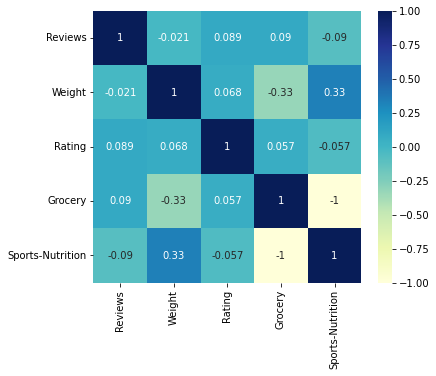

In [88]:
# showing the corolation between features
corr = df2.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr,cmap='YlGnBu', annot = True)

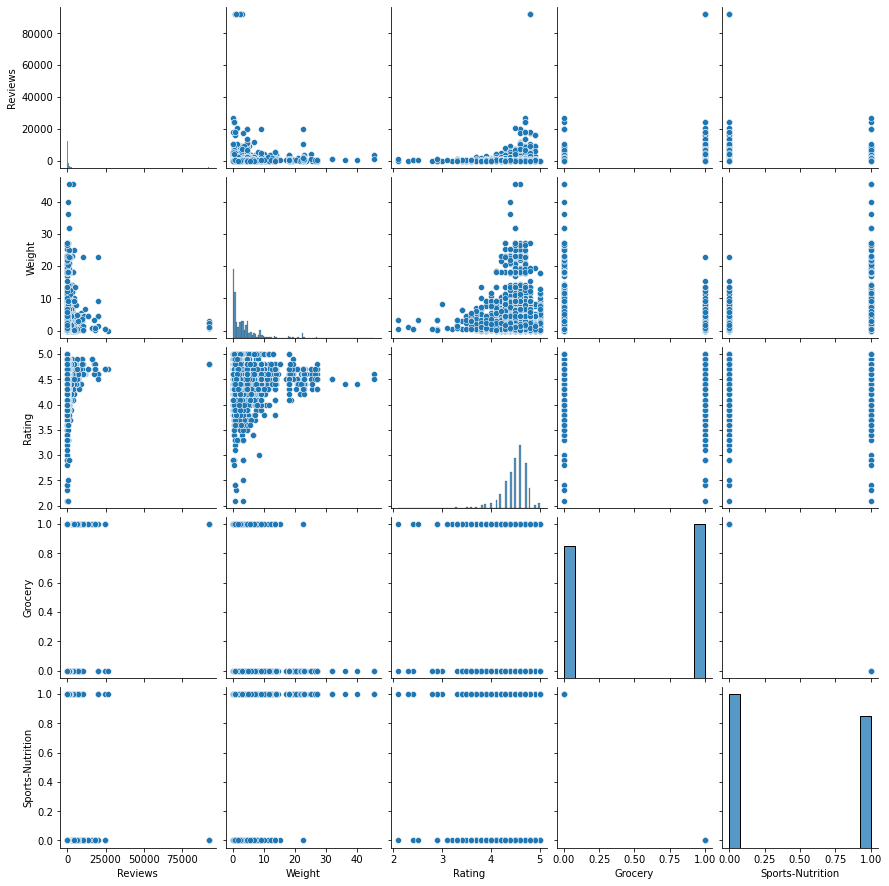

In [89]:
sns.pairplot(df2)

In [90]:
# get data describe
df2.describe()

,Reviews,Weight,Rating,Grocery,Sports-Nutrition
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,928.881173,3.604126,4.489635,0.538580,0.461420
std,4264.973867,4.948838,0.269050,0.498573,0.498573
min,1.000000,0.000000,2.100000,0.000000,0.000000
25%,87.000000,0.550000,4.400000,0.000000,0.000000
50%,263.500000,2.130000,4.500000,1.000000,0.000000
75%,706.000000,4.540000,4.700000,1.000000,1.000000
max,91932.000000,45.400000,5.000000,1.000000,1.000000


In [91]:
# save to csv 
df2.to_csv('sports_grocery.csv')

Now we will do a linear Regression in another jupyter